In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns

In [2]:
df = pd.read_csv('Breast Cancer.csv') # to read out the data set

In [3]:
df.head(30) # to see the dataframe 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

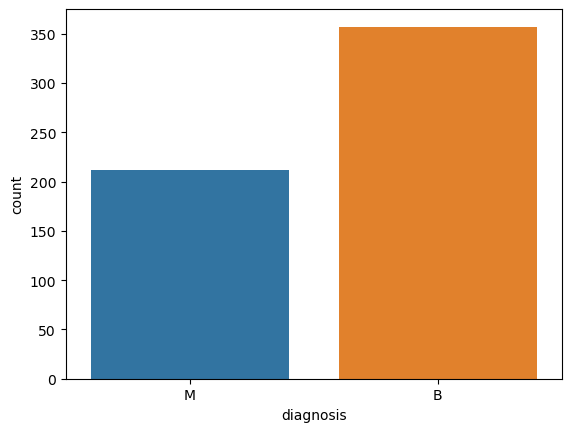

In [5]:
sns.countplot(x = 'diagnosis', data = df)

In [6]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:>

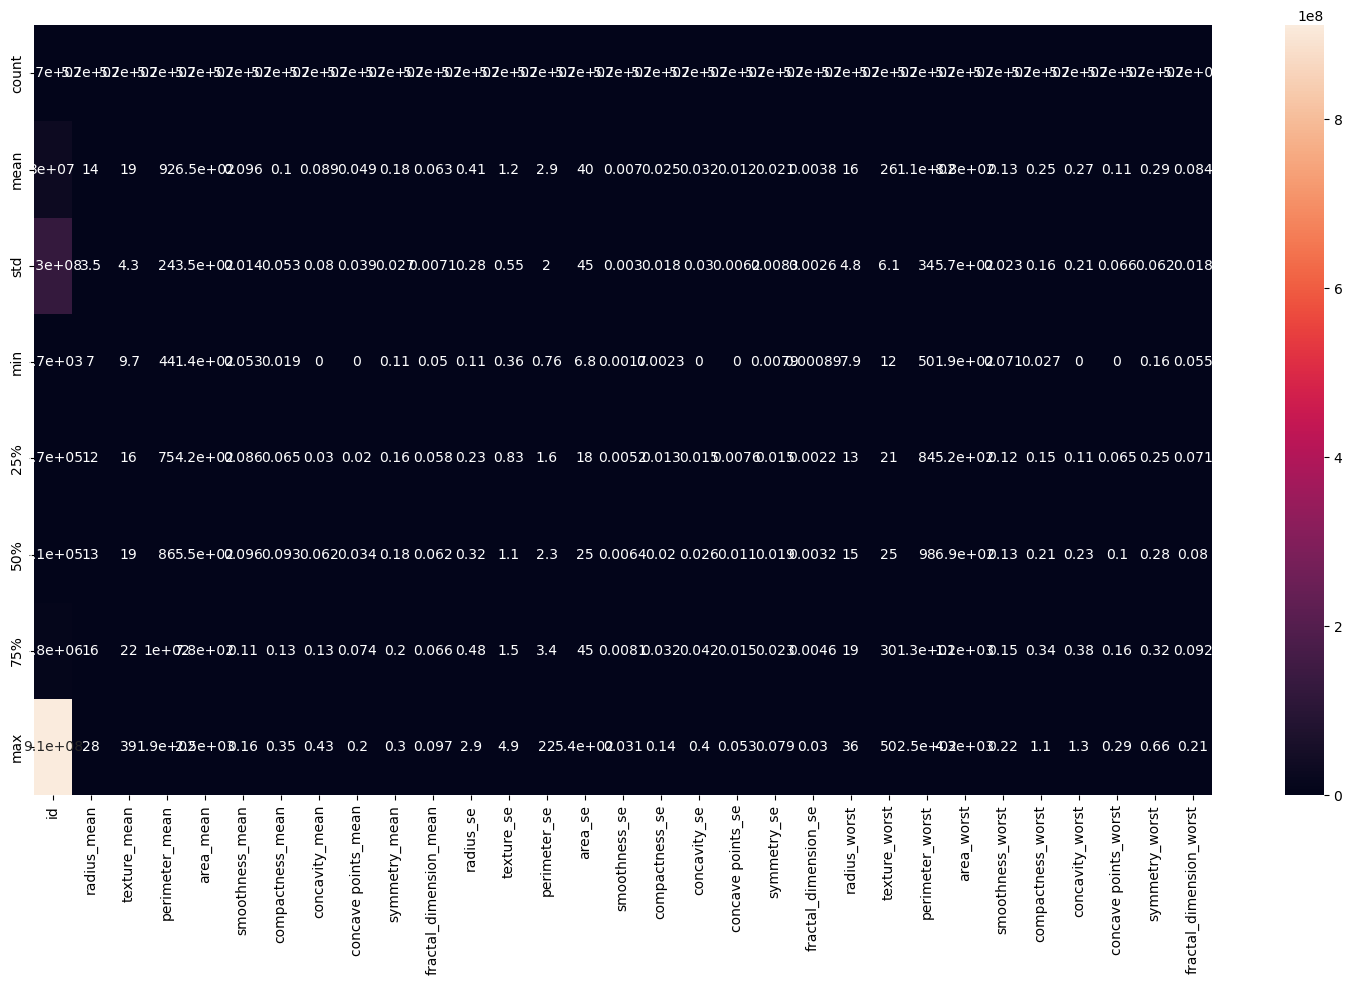

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize = (19,10))
sns.heatmap(df.describe(), annot = True)

<AxesSubplot:>

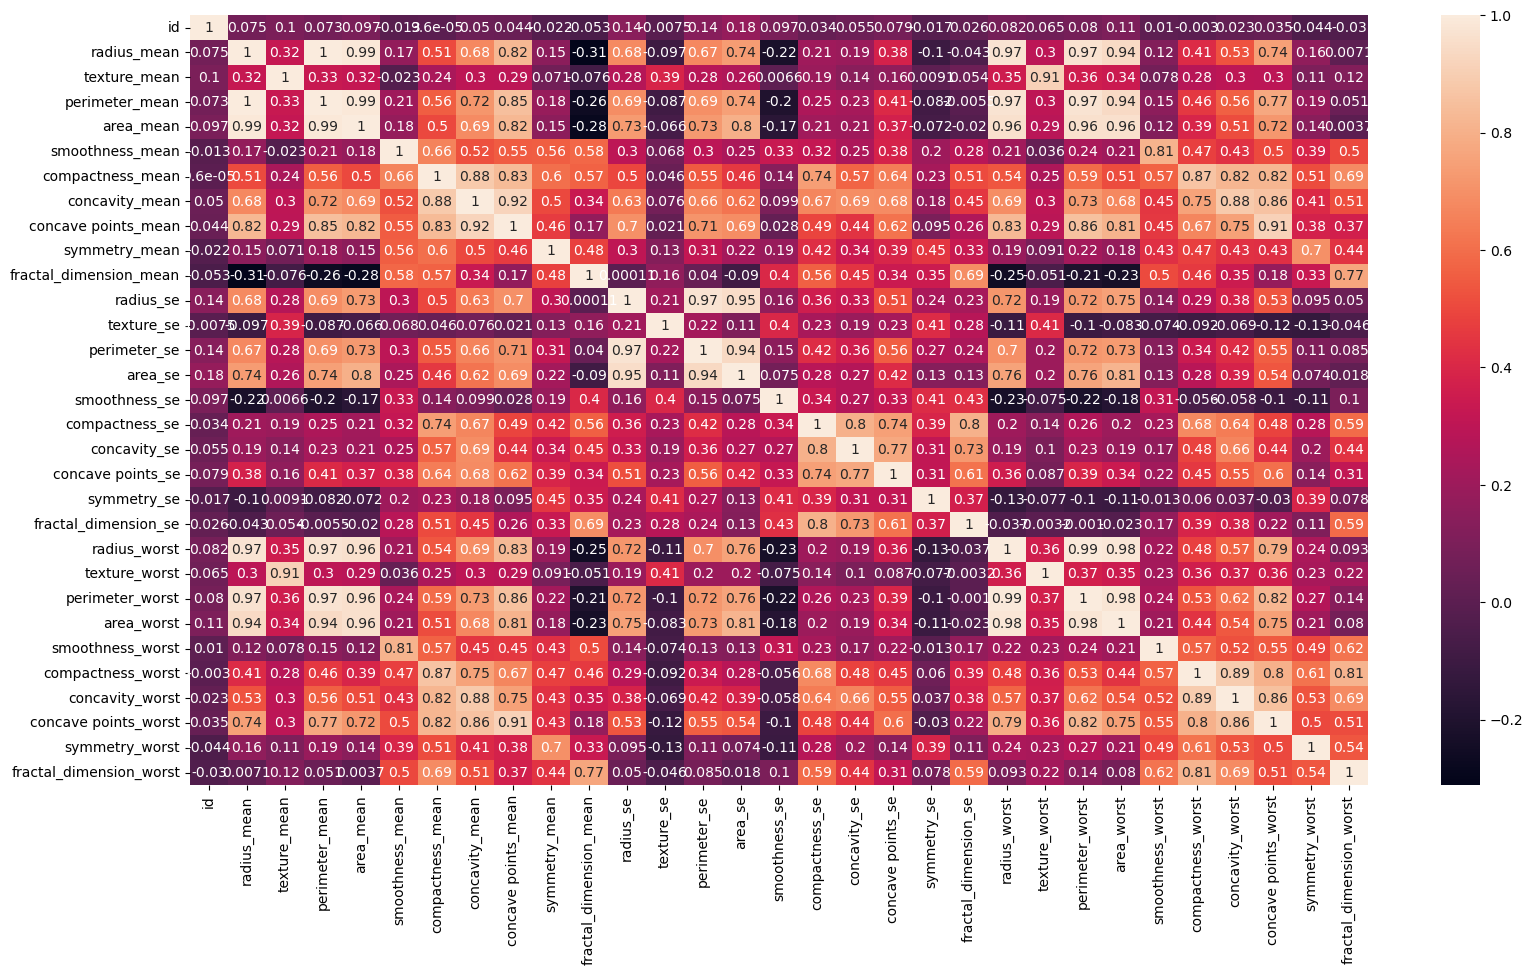

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize = (19,10))
sns.heatmap(df.corr(), annot = True)

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:xlabel='area_mean', ylabel='count'>

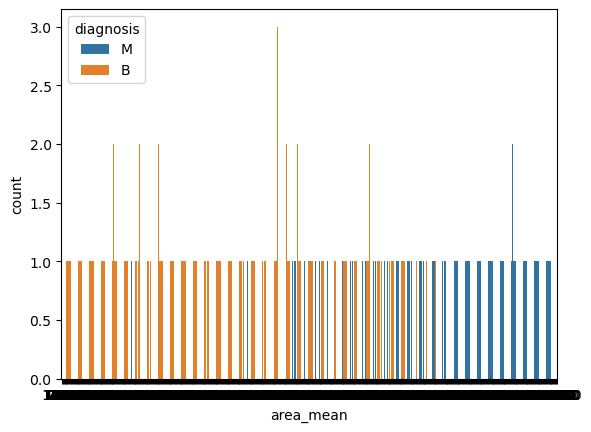

In [11]:
sns.countplot(x = 'area_mean', hue = 'diagnosis',data = df )

<AxesSubplot:xlabel='compactness_mean', ylabel='count'>

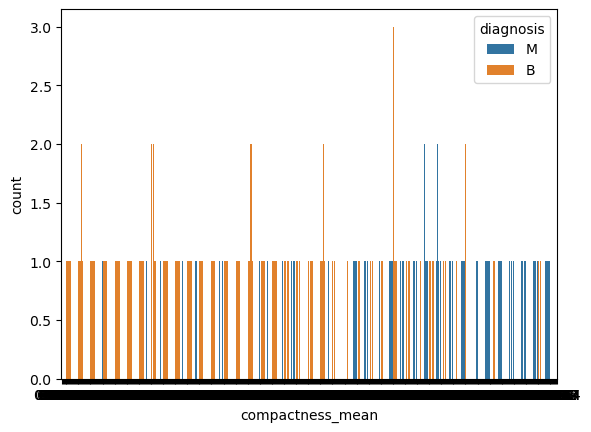

In [12]:
sns.countplot(x='compactness_mean', hue='diagnosis', data=df)

In [13]:
df.shape

(569, 32)

In [14]:
x = df.drop('diagnosis', axis = 1)

In [15]:
y = df['diagnosis']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# train 70%
#test 30%
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 42) # train size = 70%

In [18]:
xtrain.shape

(398, 31)

In [19]:
df.shape

(569, 32)

In [20]:
xtest.shape

(171, 31)

In [21]:
xtrain

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
149,869931,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
124,865468,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
421,906564,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
195,875878,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,...,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
545,922576,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,859711,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,863031,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,8910721,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,908489,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf = DecisionTreeClassifier()

In [24]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [25]:
pred = clf.predict(xtest)

In [26]:
pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [27]:
xtest['pred_y']= pred

In [28]:
xtest

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,pred_y
204,87930,12.470,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,...,24.64,96.05,677.9,0.1426,0.23780,0.2671,0.10150,0.3014,0.08750,B
70,859575,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,...,26.58,165.90,1866.0,0.1193,0.23360,0.2687,0.17890,0.2551,0.06589,M
131,8670,15.460,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,...,26.00,124.90,1156.0,0.1546,0.23940,0.3791,0.15140,0.2837,0.08019,M
431,907915,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,...,22.91,89.61,515.8,0.1450,0.26290,0.2403,0.07370,0.2556,0.09359,B
540,921385,11.540,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,...,19.68,78.78,457.8,0.1345,0.21180,0.1797,0.06918,0.2329,0.08134,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,859487,12.780,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,0.1590,...,19.76,85.67,554.9,0.1296,0.07061,0.1039,0.05882,0.2383,0.06410,B
542,921644,14.740,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,...,32.29,107.40,826.4,0.1060,0.13760,0.1611,0.10950,0.2722,0.06956,B
176,872608,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,...,24.39,73.07,390.2,0.1301,0.29500,0.3486,0.09910,0.2614,0.11620,B
501,91504,13.820,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,...,32.94,106.00,788.0,0.1794,0.39660,0.3381,0.15210,0.3651,0.11830,M


In [29]:
xtest['actual_y'] = ytest

In [30]:
ytest

204    B
70     M
131    M
431    B
540    B
      ..
69     B
542    B
176    B
501    M
247    B
Name: diagnosis, Length: 171, dtype: object

In [31]:
xtest.head(20)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,pred_y,actual_y
204,87930,12.470,18.60,81.09,481.9,0.09965,0.10580,0.080050,0.03821,0.1925,...,96.05,677.9,0.14260,0.23780,0.26710,0.10150,0.3014,0.08750,B,B
70,859575,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.108000,0.07951,0.1582,...,165.90,1866.0,0.11930,0.23360,0.26870,0.17890,0.2551,0.06589,M,M
131,8670,15.460,19.48,101.70,748.9,0.10920,0.12230,0.146600,0.08087,0.1931,...,124.90,1156.0,0.15460,0.23940,0.37910,0.15140,0.2837,0.08019,M,M
431,907915,12.400,17.68,81.47,467.8,0.10540,0.13160,0.077410,0.02799,0.1811,...,89.61,515.8,0.14500,0.26290,0.24030,0.07370,0.2556,0.09359,B,B
540,921385,11.540,14.44,74.65,402.9,0.09984,0.11200,0.067370,0.02594,0.1818,...,78.78,457.8,0.13450,0.21180,0.17970,0.06918,0.2329,0.08134,B,B
567,927241,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.351400,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400,M,M
369,9012000,22.010,21.90,147.20,1482.0,0.10630,0.19540,0.244800,0.15010,0.1824,...,195.00,2227.0,0.12940,0.38850,0.47560,0.24320,0.2741,0.08574,M,M
29,853201,17.570,15.05,115.00,955.1,0.09847,0.11570,0.098750,0.07953,0.1739,...,134.90,1227.0,0.12550,0.28120,0.24890,0.14560,0.2756,0.07919,M,M
81,8611161,13.340,15.86,86.49,520.0,0.10780,0.15350,0.116900,0.06987,0.1942,...,96.66,614.9,0.15360,0.47910,0.48580,0.17080,0.3527,0.10160,B,B
477,911673,13.900,16.62,88.97,599.4,0.06828,0.05319,0.022240,0.01339,0.1813,...,101.20,718.9,0.09384,0.20060,0.13840,0.06222,0.2679,0.07698,M,B


In [32]:
xtest= xtest.drop(['pred_y', 'actual_y'], axis =1)

In [33]:
pred = clf.predict(xtest)

In [34]:
pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Confusion Matrix

In [35]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve 

In [36]:
classification_report(ytest, pred)

'              precision    recall  f1-score   support\n\n           B       0.96      0.93      0.94       108\n           M       0.88      0.94      0.91        63\n\n    accuracy                           0.93       171\n   macro avg       0.92      0.93      0.93       171\nweighted avg       0.93      0.93      0.93       171\n'

In [37]:
print (classification_report(ytest,pred))

              precision    recall  f1-score   support

           B       0.96      0.93      0.94       108
           M       0.88      0.94      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [38]:
cm = confusion_matrix(ytest, pred)

In [39]:
cm

array([[100,   8],
       [  4,  59]], dtype=int64)

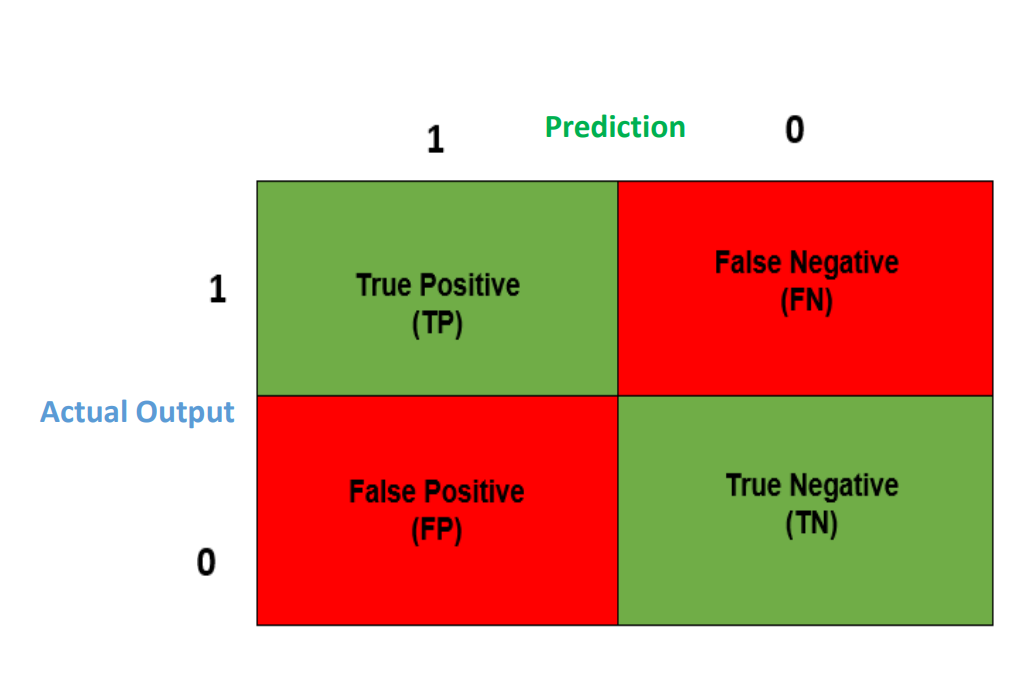

In [40]:
from IPython import display
display.Image("confusion_matrix_pic.png")

1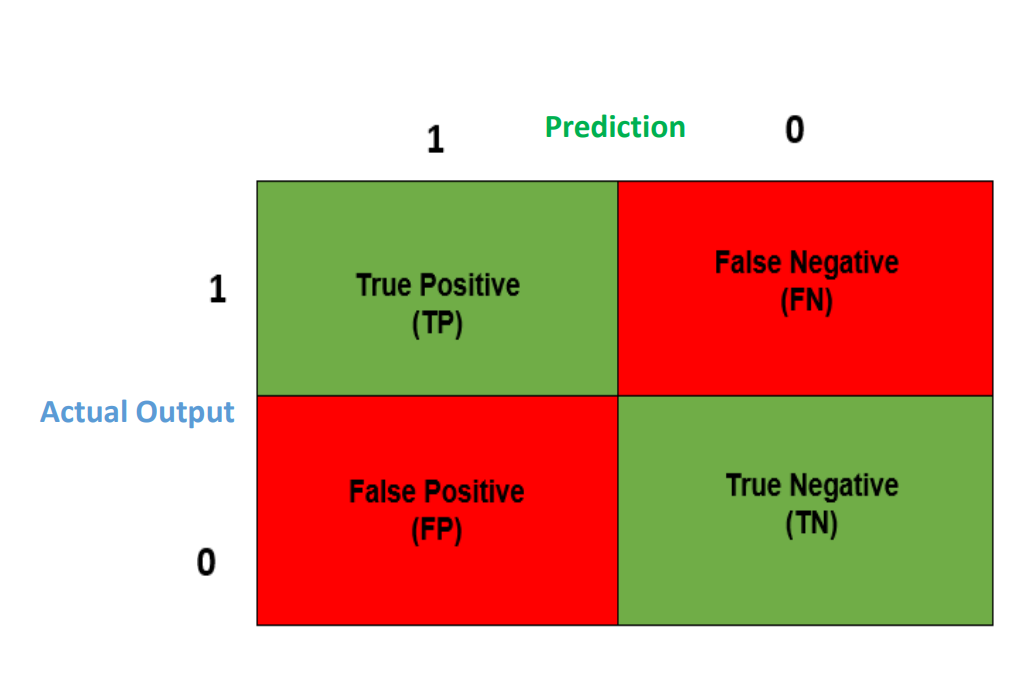

In [41]:
#Accuracy = (TP+TN)/(TP+TN+FP+FN)
(102+59)/(102+59+4+6)

0.9415204678362573

In [42]:
clf.score(xtest,ytest)

0.9298245614035088

In [43]:
accuracy_score(ytest,pred)

0.9298245614035088

In [44]:
tp, fn, fp, tn =  confusion_matrix(ytest, pred).reshape(-1)

In [45]:
tp

100

In [46]:
fn

8

In [47]:
fp

4

In [48]:
tn

59

# ROC and AUC

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


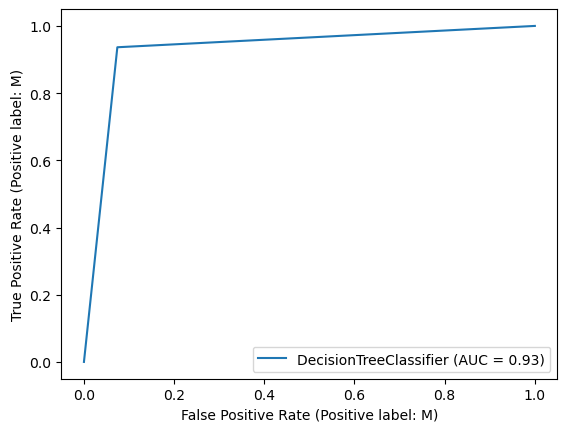

In [49]:
plot_roc_curve(clf,xtest,ytest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


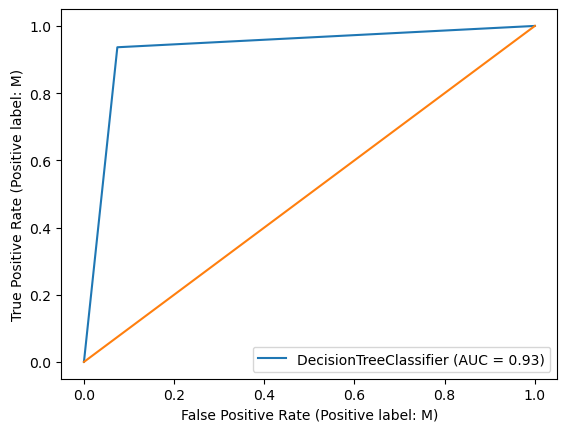

In [50]:
plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1],[0,1])

In [51]:
cm

array([[100,   8],
       [  4,  59]], dtype=int64)

In [52]:
print (classification_report(ytest,pred))

              precision    recall  f1-score   support

           B       0.96      0.93      0.94       108
           M       0.88      0.94      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [53]:
#Precision/PPV = True Positive / (True Positive + False Positive)

102/(102+4)

0.9622641509433962

In [54]:
#Sensitivity, Recall, Hit Rate, or True Positive Rate (TPR)

#TPR = True Positive / (True Positive + False Negative)

TPR = 102/(102+6)
TPR

0.9444444444444444

In [55]:
#False Positive Rate (FPR) or 1-Specificity

#FPR = FP / (FP + TN)

FPR = 4/(4+59)
FPR


0.06349206349206349

In [56]:
#F1 Measure; 
#F1 Measure = (Precision + Recall) / 2
F1 = (.96+ .94)/2
F1

0.95

In [57]:
#Harmonic Mean, F1 Score
#F1 = ( 2 * Precision * Recall ) / (Precision + Recall) 
F1 = 2*.96*.94/(.96+ .94)
F1

0.9498947368421051

In [58]:
#Specificity, Selectivity or True Negative Rate (TNR)
#Specificity = True Negative / (True Negative + False Positive)
Sp = 59/(59+4)
Sp

0.9365079365079365

In [59]:
#Threat Score (TS) or Critical Success Index (CSI)
#CSI = TP / (TP + FN + FP)
CSI = 102/(102+6+4)
CSI

0.9107142857142857

In [60]:
#False Discovery Rate (FDR)
#FDR = FP / (TP + FP )
FDR = 4/ (102+4)
FDR

0.03773584905660377